## Analysis of Funding Received by Start-ups in India from 2018 to 2021

# 1. Business Understanding

     1.1 Project Description

This is analysis project focuses on the funding received by start-ups in India from 2018 to 2021. The objective is to gain insights into the Indian start-up ecosystem and recommend the best action for our team's venture. By analyzing the data on funding amounts, start-up details, and investor information, we aim to uncover prevailing patterns and gain insights into the opportunities within India's start-up ecosystem to inform decision-making.

     1.2 Type of Problem

This project involves exploratory data analysis (EDA) and visualization. Our goal is to deduce hidden insights and patterns from the available data.


## 2. Data Understanding

We have collected data from various startups in India spanning the years 2018 to 2021, including information on the amounts they received in funding. By analyzing this data, we aim to gain a deeper insight into the startup ecosystem and identify the key contributing factors.


## 3. Data Assumptions

The amounts in the 2019 dataset are all in USD. Please note that the exchange rate for 2018 is \***\*1 USD = 70 INR**.


## 4. Data Analytics questions and Hypthesis


    5 SMART Analytics Questions:

1.  What is the overall trend in funding received by start-ups in India from 2018 to 2021?
2.  Which sectors have received the highest funding during this period?
3.  What is the distribution of startups across the cities in India?
4.  What is the average funding amount received by start-ups in India during this period?
5.  Hypotheses

Hypothesis 2

**Null Hypothesis (H₀):** There are no significant disparities in funding received by different sectors of Indian startups.

**Alternate Hypothesis (Ha):** The technology sector receives significantly higher funding compared to other industries.

Hypothesis 2

**Null Hypothesis (H₀):** The location of a startup in a particular city does not influence the amount of funding it receives.

**Alternate Hypothesis (Ha):** The location of a startup in a particular city significantly affects the amount of funding it receives.

    Hypotheses justifications

**Hypothesis 1:** The technology sector is often seen as a high-growth area with substantial investment potential, which may lead to higher funding.

**Hypothesis 2:** Certain cities might have more developed startup ecosystems, better infrastructure, and more active investment communities, which could impact funding amounts.

    Testing Methods

**For Hypothesis 1:** We will use statistical tests like t-tests to compare the average funding amounts across different sectors.

**For Hypothesis 2:** We will use statistical tests such regression analysis to analyze the funding amounts across different cities.


## 5. Data preparation


    5.1 Importing libraries


In [1]:

import os, sys
from sqlalchemy import create_engine
import pyodbc # Database Connectivity with  Open Database Connectivity (pyodbc)
from dotenv import dotenv_values # dotenv library to load environment variables

# Lib for data manipulation  analysis  
import pandas as pd
import numpy as np
import sklearn

from sklearn.impute import SimpleImputer

# lib for Vizualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy import stats
from prettytable import PrettyTable
# from matplotlib.ticker import FuncFormatter
import re # regular expressions.

import warnings
warnings.filterwarnings('ignore')

    5.2 Loading datasets


In [2]:
# Load environment variables from .env file 

environment_variables=dotenv_values('.env')
# Access login credentials from  the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")

In [3]:
#  Credection Connection tesr
connection = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [4]:
# connect to the server .

con = pyodbc.connect(connection)

In [5]:
# Load the dataset SQL query
query1 = "Select * from dbo.LP1_startup_funding2020"
query2 = "Select * from dbo.LP1_startup_funding2021"

# Read data from the  on dataset to the dataframe 
data_2018 = pd.read_csv('dataset\startup_funding2018.csv')
data_2019 = pd.read_csv('dataset\startup_funding2019.csv')
data_2020 = pd.read_sql(query1, con)
data_2021 = pd.read_sql(query2, con)

    5.2.1 Data Overview


In [6]:
# 2018 dataset 
data_2018.head(3)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India


In [7]:
# 2019 dataset 
data_2019.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding


In [8]:
# 2020 dataset 
data_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


In [9]:
# 2021 dataset 
data_2021.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D


Similarities of datasets


In [130]:
data_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [131]:
data_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

In [132]:
data_2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [133]:
data_2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

        5.3 Data Exploration


    5.3.1 2018 Data


5.3.1.1 Data Inspection


![Data 2018 Summary Image](Images\2018DataWrangler1.png)


In [9]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


Statistics summary of 2018 data


From the result summary

- 2018 Data has no Missing values
- columns are in string data type


5.3.1.2 Handling Missing values


start by checking Unique values in each column


In [10]:
def uniqueValue(data, column): #Industry, Round/Series,Amount, Location and Amount
    return data[column].value_counts()    

In [11]:
#Industry
uniqueValue(data_2018,'Industry')

Industry
—                                              30
Financial Services                             15
Education                                       8
Information Technology                          7
Health Care, Hospital                           5
                                               ..
Education, Gaming, Training                     1
Automotive, Search Engine, Service Industry     1
Wealth Management                               1
B2B, Farming, Marketplace                       1
Biotechnology, Health Care, Pharmaceutical      1
Name: count, Length: 405, dtype: int64

In [12]:
uniqueValue(data_2018,'Round/Series')

Round/Series
Seed                                                                                                       280
Series A                                                                                                    73
Angel                                                                                                       37
Venture - Series Unknown                                                                                    37
Series B                                                                                                    20
Series C                                                                                                    16
Debt Financing                                                                                              13
Private Equity                                                                                              10
Corporate Round                                                                                    

The Column has Incosistent data
Its have a int64 to be converted to string
and have Undisclosed, undisclosed


In [13]:
uniqueValue(data_2018,'Amount')

Amount
—              148
1000000         24
500000          13
2000000         12
₹50,000,000      9
              ... 
2200000          1
1200000          1
$15,000          1
$1,041,000       1
35000000         1
Name: count, Length: 198, dtype: int64

From this information we ave to assume that

- the amount with not current as USD Amount
- the Column Incosistent data, has comma, has 3 different current


In [14]:
uniqueValue(data_2018,'Location')

Location
Bangalore, Karnataka, India         102
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India    

The location the is have inconsitent need to need to be cleaned


5.3.1.3 Data cleaning


    Check Duplications


In [15]:

data_2018.duplicated().value_counts()

False    525
True       1
Name: count, dtype: int64

Duplications


In [16]:
data_2018[data_2018.duplicated(keep=False)]

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


Dropping data duplicate


In [17]:
# Drop 2018 data duplicates
data_2018 = data_2018.drop_duplicates()

In [18]:
# double check the doublicates again 
data_2018.duplicated().value_counts()

False    525
Name: count, dtype: int64

No duplicate anymore in data 2018


Columns Data types


The `Amount` column is currently classified as a string data type, but it should be represented as an integer. Several issues in this column need to be addressed:

- **Character Removal:** The presence of `,`, `$`, and `₹` characters must be eliminated.
- **Null Values:** The `_` characters, indicating null values, need to be handled appropriately.
- **Currency Standardization:** Amounts in Indian Rupees will be converted to US Dollars to maintain a consistent currency standard.we need ti use our assumption 1 USD = 70rupee based on avarege exchange rate of 2018
- **Data Type Conversion:** Finally, the `Amount` column will be converted to a numeric data type.


In [20]:
# Remove ',' in amount
data_2018['Amount'].replace(',','', regex=True, inplace=True)
data_2018['Amount'].sample(5)

292       2000000
381             —
147    ₹102500000
330     ₹20000000
379    ₹240000000
Name: Amount, dtype: object

In [21]:
# A function to convert amount to $ and clean the amount column
def convert_to_usd(amount):
    exchange_rate = 68.4  # Average exchange rate in 2018 to USD: 68.4113 INR.[https://www.exchangerates.org.uk/USD-INR-spot-exchange-rates-history-2018.html]

    if '₹' in str(amount):  #  if  amount is in INR
        amount = (str(amount).replace('₹', ''))  

        return pd.to_numeric(amount, errors='coerce' )/ exchange_rate

    elif '$' in str(amount):

        return  amount.replace('$','')

    elif "—" in str(amount):

        return None  
    else:
        return (amount)

pd.set_option('display.float_format', '{:.1f}'.format)
# Apply the conversion function to the 'Amount' column
data_2018["Amount"] = data_2018["Amount"].apply(convert_to_usd)



conventing the data to numeric


In [22]:
data_2018["Amount"]=data_2018["Amount"].astype(float)
data_2018["Amount"].dtype

dtype('float64')

In [23]:
data_2018['Amount'].isnull().sum()

148

In [24]:
#Imputing missing values
array= data_2018["Amount"].values.reshape(-1,1) #
imputer=SimpleImputer(strategy="median")

data_2018["Amount"]=imputer.fit_transform(array)

In [25]:
data_2018["Amount"].sample(5)


334    1973684.2
85     5000000.0
73     1300000.0
503   28000000.0
338    1300000.0
Name: Amount, dtype: float64

In [26]:
data_2018['Amount'].isnull().sum()

0

Based on other data across other 3 datasets which will later make merging easier, `Location` and `Industry` columns will only remain with the first word.


In [27]:
data_2018["Location"].sample(10)

361    Hyderabad, Andhra Pradesh, India
4      Hyderabad, Andhra Pradesh, India
155             Gurgaon, Haryana, India
270             Gurgaon, Haryana, India
419             Gurgaon, Haryana, India
294             New Delhi, Delhi, India
445             New Delhi, Delhi, India
439         Bengaluru, Karnataka, India
7      Hyderabad, Andhra Pradesh, India
321         Noida, Uttar Pradesh, India
Name: Location, dtype: object

In [28]:
# removing space and Capilize
data_2018["Location"] = data_2018["Location"].str.strip()
data_2018["Location"] = data_2018["Location"].str.title()

# split the address the Have multiple
data_2018["Location"] = data_2018["Location"].map(lambda x: x.split(',')[0])
data_2018["Location"].sample(10)


280       Mumbai
0      Bangalore
360    Bengaluru
175    Bengaluru
9      Bangalore
111       Mumbai
381    Bangalore
120         Pune
354        Delhi
229    Bangalore
Name: Location, dtype: object

In [29]:
data_2018["Industry"].head(10)

0    Brand Marketing, Event Promotion, Marketing, S...
1                                 Agriculture, Farming
2     Credit, Financial Services, Lending, Marketplace
3                          Financial Services, FinTech
4                   E-Commerce Platforms, Retail, SaaS
5                     Cloud Infrastructure, PaaS, SaaS
6                       Internet, Leisure, Marketplace
7                                      Market Research
8         Information Services, Information Technology
9                                      Mobile Payments
Name: Industry, dtype: object

In [30]:
data_2018["Industry"] = data_2018["Industry"].map(lambda x: str(x).split(',')[0].strip() if pd.notnull(x) else x)

data_2018["Industry"].unique().tolist()

['Brand Marketing',
 'Agriculture',
 'Credit',
 'Financial Services',
 'E-Commerce Platforms',
 'Cloud Infrastructure',
 'Internet',
 'Market Research',
 'Information Services',
 'Mobile Payments',
 'B2B',
 'Apps',
 'Food Delivery',
 'Industrial Automation',
 'Automotive',
 'Finance',
 'Accounting',
 'Artificial Intelligence',
 'Internet of Things',
 'Air Transportation',
 'Food and Beverage',
 'Autonomous Vehicles',
 'Enterprise Software',
 'Logistics',
 'Insurance',
 'Information Technology',
 'Blockchain',
 'Education',
 'E-Commerce',
 'Renewable Energy',
 'E-Learning',
 'Clean Energy',
 'Transportation',
 'Fitness',
 'Hospitality',
 'Media and Entertainment',
 'Broadcasting',
 'EdTech',
 'Health Care',
 '—',
 'Sports',
 'Big Data',
 'Cloud Computing',
 'Food Processing',
 'Trading Platform',
 'Consumer Goods',
 'Wellness',
 'Fashion',
 'Consulting',
 'Biotechnology',
 'Communities',
 'Consumer',
 'Consumer Applications',
 'Mobile',
 'Advertising',
 'Marketplace',
 'Aerospace',
 'Ho

In [32]:
data_2018['Industry'] = data_2018['Industry'].replace('', np.nan)


In [41]:

def Industry_redistribution(Industry):
    if re.search(r'finance|credit|financial services|Funding Platform|accounting|insurance|blockchain|trading platform|crowdfunding|consumer lending|banking|wealth management|credit cards|fintech|fraud detection|cryptocurrency', Industry, re.IGNORECASE):
        return 'Finance'
    elif re.search(r'transport|automotive|air transport|logistics|autonomous vehicles|transportation|delivery|aerospace|electric vehicle|delivery service|last mile transportation', Industry, re.IGNORECASE):
        return 'Transport'
    elif re.search(r'technology|Enterprise Resource Planning (ERP)|it|File Sharing|Crowdsourcing|Battery|Computer|Android|Information Services|Enterprise Resource Planning (ERP)|artificial intelligence|cloud|internet|software|big data|iot|nanotechnology|embedded systems|smart cities|search engine|mobile|apps|cloud computing|digital entertainment|saas|digital media|information technology|biotechnology|facilities support services|communities|hospitality|digital marketing|edtech|media and entertainment|internet of things|3d printing', Industry, re.IGNORECASE):
        return 'Technology'
    elif re.search(r'health|medical|hospital|biotechnology|biopharma|Child Care|health diagnostics|health insurance|alternative medicine|dental|medical device|veterinary|health care', Industry, re.IGNORECASE):
        return 'Healthcare'
    elif re.search(r'e-commerce|marketplace|retail|online portals|e-commerce platforms', Industry, re.IGNORECASE):
        return 'E-Commerce'
    elif re.search(r'education|e-learning|edtech|continuing education|children|career planning', Industry, re.IGNORECASE):
        return 'Education'
    elif re.search(r'entertainment|sports|fitness|Basketball|wellness|media|digital media|digital entertainment|gaming|online games|fantasy sports|music|music streaming|esports|audio|broadcasting|news|social media', Industry, re.IGNORECASE):
        return 'Entertainment'
    elif re.search(r'marketing|brand marketing|Classifieds|digital marketing|advertising|market research', Industry, re.IGNORECASE):
        return 'Marketing'
    elif re.search(r'consumer|consumer goods|consumer applications|consumer electronics|fashion|cosmetics|shoes|beauty|wellness|fitness|dietary supplements|home decor|catering|cooking|hospitality|tourism|travel|rental|dating|events|wedding|cosmetics|eyewear|shopping|restaurants|food and beverage|food delivery|food processing|organic food|snack food|tea|food|beverage', Industry, re.IGNORECASE):
        return 'Consumer Services'
    elif re.search(r'industrial|manufacturing|industrial automation|facilities support services|cleantech|clean energy|renewable energy|packaging services|energy|3d printing|clean energy', Industry, re.IGNORECASE):
        return 'Industrial'
    elif re.search(r'agriculture|farming|agtech|farmers market|agriculture', Industry, re.IGNORECASE):
        return 'Agriculture'
    elif re.search(r'human resources|hr|training|customer service', Industry, re.IGNORECASE):
        return 'Human Resources'
    elif re.search(r'consulting|customer service|Commercial|B2B|Collaboration|environmental consulting|business development|commercial real estate|business intelligence|outsourcing|analytics|business services|creative agency', Industry, re.IGNORECASE):
        return 'Business Services'

    else:
        return Industry

# List of categories
categories = data_2018['Industry']
# Categorize each item in the list
categorized_items = {category: Industry_redistribution(category) for category in categories}

# Print categorized items
for item, category in categorized_items.items():
    print(f"{item}: {category}")


Marketing: Marketing
Agriculture: Agriculture
Finance: Finance
E-Commerce: E-Commerce
Technology: Technology
Business Services: Business Services
Transport: Transport
Industrial: Industrial
Consumer Services: Consumer Services
Education: Education
Entertainment: Entertainment
Healthcare: Healthcare
Enterprise Resource Planning (ERP): Enterprise Resource Planning (ERP)
Government: Government
Human Resources: Human Resources


In [42]:

# Apply the Industry_redistribution function to the 'Industry' column and update it
data_2018['Industry'] = data_2018['Industry'].apply(Industry_redistribution)

In [50]:
#replace '—' with null in data_2018['Industry']

# Replace '—' with NaN
data_2018['Industry'] = data_2018['Industry'].replace('—', np.nan)

# Replace empty strings with NaN
data_2018['Industry'] = data_2018['Industry'].replace('', np.nan)

In [51]:
# Define the SimpleImputer with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the data to impute missing values
data_2018['Industry'] = imputer.fit_transform(data_2018[['Industry']]).ravel() ## Define the SimpleImputer with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the data to impute missing values
data_2018['Industry'] = imputer.fit_transform(data_2018[['Industry']]).ravel()

In [55]:
data_2018['Industry'].unique().tolist()

['Marketing',
 'Agriculture',
 'Finance',
 'E-Commerce',
 'Technology',
 'Business Services',
 'Transport',
 'Industrial',
 'Consumer Services',
 'Education',
 'Entertainment',
 'Healthcare',
 'Enterprise Resource Planning (ERP)',
 'Government',
 'Human Resources']

In [160]:
data_2018['Industry'].unique().tolist()

['Marketing',
 'Agriculture',
 'Finance',
 'E-Commerce',
 'Technology',
 'Information Services',
 'B2B',
 'Transport',
 'Industrial',
 'Consumer Services',
 'Education',
 'Entertainment',
 'Healthcare',
 '—',
 'Business Services',
 'Funding Platform',
 'Classifieds',
 'Enterprise Resource Planning (ERP)',
 'Government',
 'Human Resources',
 'Collaboration',
 'File Sharing',
 'Computer',
 'Android',
 'Basketball',
 'Crowdsourcing',
 'Commercial',
 'Child Care',
 'Battery']

handle missing value


In [161]:
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

Missig value of 28% in column amount is a significant portion, let ` imputing with the median` which a practical approach that prevents data loss while providing a reasonable estimate.


In [162]:
# Statistics summary
data_2018['Amount'].describe().T

count          525.0
mean      13020215.9
std       66462609.1
min            877.2
25%         730994.2
50%        1300000.0
75%        3000000.0
max     1000000000.0
Name: Amount, dtype: float64

In [163]:
# impute null value by median 
# data_2018['Amount'].fillna(data_2018['Amount'].median(), inplace=True)
amount_invested = data_2018["Amount"].values.reshape(-1,1)

imputer = SimpleImputer(strategy="median")

data_2018["Amount"] = imputer.fit_transform(amount_invested)

In [164]:
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

To make merging and analysis easier, we will add a column called `Year Funded` that contains the year each startup received funding.


In [165]:
data_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,525.0,13020215.9,66462609.1,877.2,730994.2,1300000.0,3000000.0,1000000000.0


track the year od fundings by creating colum with 2018 as value


In [166]:
data_2018['Year Funded']= 2018

In [167]:
data_2018.sample(15)

,Company Name,Industry,Round/Series,Amount,Location,About Company,Year Funded
80,Propelld,Education,Seed,250000.0,Bengaluru,Propelld is a student education financing plat...,2018
120,Dee Dee Labs,Technology,Seed,1300000.0,Pune,Dee Dee Labs is design and development lab wit...,2018
166,artbandhu,Technology,Pre-Seed,15000.0,Bangalore,Ai platform for Art and Creative Community,2018
195,HeyHolidays,Consumer Services,Seed,1000000.0,Bangalore,"HeyHolidays, a global player in online vacatio...",2018
298,Doxper,Healthcare,Seed,1052631.6,Mumbai,Doxper is Health tech startup which has create...,2018
47,Fitternity,Technology,Seed,2000000.0,Mumbai,India's largest online fitness platform that p...,2018
522,Happyeasygo Group,Consumer Services,Series A,1300000.0,Haryana,HappyEasyGo is an online travel domain.,2018
300,ShakeDeal,B2B,Seed,1300000.0,Bangalore,Home of B2B Commerce,2018
101,Swiggy,Transport,Series H,1000000000.0,Bangalore,Swiggy is a food ordering and delivery company...,2018
444,Zomato,Transport,Secondary Market,210000000.0,Gurgaon,Zomato is a search app offering detailed infor...,2018


Data Summary after cleaning


![Data 2018 Summary Image](Images\2018DataWrangler2.png)


    5.3.2 2019 Data


![Data 2018 Summary Image](Images\2019beforeCleaning.png)


5.3.2.1 Data Inspection


In [168]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [169]:
data_2019.sample(15)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
70,Zebu,2015.0,NaN,Cybersecurity,Platform uses encryption technology to allow b...,Team of Waterloo-based software developers,Undisclosed,"$4,000,000",Seed round
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"$275,000,000",Series G
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
10,Cub McPaws,2010.0,Mumbai,E-commerce & AR,A B2C brand that focusses on premium and comf...,"Abhay Bhat, Kinnar Shah",Venture Catalysts,Undisclosed,NaN
30,Licious,NaN,Bangalore,Food,Online meat shop,"Vivek Gupta, Abhay Hanjura",Vertex Growth Fund,"$30,000,000",Series E
57,m.Paani,NaN,Mumbai,NaN,It digitizes and organises local retailers,Akanksha Hazari,"AC Ventures, Henkel","$5,500,000",Series A
14,Open Secret,NaN,NaN,Food tech,It produces and sells top quality snacks,"Ahana Gautam, Udit Kejriwal",Matrix Partners,Undisclosed,NaN
80,Ola,2010.0,Bangalore,Transportation,It enables one to book cab online,"Bhavish Aggarwal, Ankit Bhati","Kia Motors, Hyundai","$311,000,000",NaN
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
64,Moms Co,NaN,New Delhi,E-commerce,It is into mother and baby care-focused consum...,Malika Sadani,"Saama Capital, DSG Consumer Partners","$5,000,000",Series B


5.3.2.2 Data Inspection


Insight from above

- We have 87 Unique companies
- Most columns are string data type excpt Founded column
- We have missing values in Founded 29(33%), Headquarter 19(21%), Sector6(6%), Founders, Stage 46(52%)
- City with most startup in 2019 data is Bnagalore (24%), Mumbai (13%) and Delhi (11%), the missing Values is 21%
- From amount column undisclosed is having 13%


To speed up the data cleaning process, let uses d=function

1. For Descriptive statistics of a variable
2. For Data distribution of a variable (histogram)
3. For Check for missing values in a variable and ploting it


In [170]:
# To find descriptive statistics of ou data
def descriptive_statistics(variable):
    return variable.describe()

# To plot the data distribution of out data using a histogram
def plot_data_distribution(variable):
    plt.hist(variable)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

# To check for missing values in a variable
def check_missing_values(variable):
    return variable.isnull().sum()

# To detect outliers
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
# ploting missing values 
def plot_missing_values_heatmap(df):
    # indicating missing values
    missing_values = df.isnull()

    colors = sns.color_palette(['#FF9933', '#FFFFFF', '#138808'])  # Saffron, White, Green(Indian color) as am working with the data related to India
    # Plotting 
    sns.heatmap(missing_values, cmap=colors)
    plt.title('Missing Values Heatmap')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()
def check_unique_value_in_column(dataset, column):
    return dataset[column].unique().tolist() 

    

5.3.2.2 Unique values in eacah columns of data


In [171]:
check_unique_value_in_column(data_2019, 'Company/Brand')

['Bombay Shaving',
 'Ruangguru',
 'Eduisfun',
 'HomeLane',
 'Nu Genes',
 'FlytBase',
 'Finly',
 'Kratikal',
 'Quantiphi',
 'Lenskart',
 'Cub McPaws',
 'Appnomic',
 'Kaleidofin',
 'JobSquare',
 'Open Secret',
 'LivFin',
 "Byju's",
 'Zest Money',
 'Witblox',
 'Azah Personal Care Pvt. Ltd.',
 'SalaryFits',
 'Pristyn Care',
 'Springboard',
 'DROR Labs Pvt. Ltd',
 'Medlife',
 'Seekify',
 'Toffee Insurance',
 'Fireflies .ai',
 'HungerBox',
 'Bijak',
 'Licious',
 'truMe',
 'Pumpkart',
 'Asteria Aerospace',
 'Rivigo',
 'HappyEasyGo',
 'Zetwerk',
 'Observe.AI',
 'Freshokartz',
 'Lil’ Goodness and sCool meal',
 'Trell',
 'VMate',
 'Bombay Shirt Company',
 'Slintel',
 'MyGameMate',
 'Afinoz',
 'Rein Games',
 'Ecozen',
 'Box8',
 'Awign Enterprises',
 'Purplle',
 'Freightwalla',
 'TapChief',
 'eJOHRI',
 'Ninjacart',
 'Binca Games',
 'KredX',
 'm.Paani',
 'Origo',
 'WishADish',
 'Ecom Express',
 'Stanza Living',
 'PiBeam',
 'Euler Motors',
 'Moms Co',
 'Cubical Labs',
 'Lawyered',
 'Cuemath',
 'Nive

In [172]:
check_unique_value_in_column(data_2019, 'Founded')


[nan,
 2014.0,
 2004.0,
 2013.0,
 2010.0,
 2018.0,
 2019.0,
 2017.0,
 2011.0,
 2015.0,
 2016.0,
 2012.0,
 2008.0]

In [173]:
check_unique_value_in_column(data_2019, 'HeadQuarter')


[nan,
 'Mumbai',
 'Chennai',
 'Telangana',
 'Pune',
 'Bangalore',
 'Noida',
 'Delhi',
 'Ahmedabad',
 'Gurugram',
 'Haryana',
 'Chandigarh',
 'Jaipur',
 'New Delhi',
 'Surat',
 'Uttar pradesh',
 'Hyderabad',
 'Rajasthan']

In [174]:
check_unique_value_in_column(data_2019, 'Sector')


['Ecommerce',
 'Edtech',
 'Interior design',
 'AgriTech',
 'Technology',
 'SaaS',
 'AI & Tech',
 'E-commerce',
 'E-commerce & AR',
 'Fintech',
 'HR tech',
 'Food tech',
 'Health',
 'Healthcare',
 'Safety tech',
 'Pharmaceutical',
 'Insurance technology',
 'AI',
 'Foodtech',
 'Food',
 'IoT',
 'E-marketplace',
 'Robotics & AI',
 'Logistics',
 'Travel',
 'Manufacturing',
 'Food & Nutrition',
 'Social Media',
 nan,
 'E-Sports',
 'Cosmetics',
 'B2B',
 'Jewellery',
 'B2B Supply Chain',
 'Games',
 'Food & tech',
 'Accomodation',
 'Automotive tech',
 'Legal tech',
 'Mutual Funds',
 'Cybersecurity',
 'Automobile',
 'Sports',
 'Healthtech',
 'Yoga & wellness',
 'Virtual Banking',
 'Transportation',
 'Transport & Rentals',
 'Marketing & Customer loyalty',
 'Infratech',
 'Hospitality',
 'Automobile & Technology',
 'Banking']

In [175]:
check_unique_value_in_column(data_2019, 'Founders')



['Shantanu Deshpande',
 'Adamas Belva Syah Devara, Iman Usman.',
 'Jatin Solanki',
 'Srikanth Iyer, Rama Harinath',
 'Narayana Reddy Punyala',
 'Nitin Gupta',
 'Vivek AG, Veekshith C Rai',
 'Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa',
 'Renuka Ramnath',
 'Peyush Bansal, Amit Chaudhary, Sumeet Kapahi',
 'Abhay Bhat, Kinnar Shah',
 'D Padmanabhan',
 'Puneet Gupta, Sucharita Mukherjee',
 'Ishit Jethwa',
 'Ahana Gautam, Udit Kejriwal',
 'Rakesh Malhotra',
 'Byju Raveendran',
 'Chapman, Priya Sharma, Ashish Anantharaman',
 'Amit Modi',
 'Mohammed, Shashwat Diesh',
 'Renato Araujo',
 'Harsimarbir Singh, Dr Vaibhav Kapoor, Dr Garima Sawhney',
 'Gautam Tambay, Parul Gupta',
 'Dhiraj Naubhar, Dheeraj Bansal',
 'Tushar Kumar, Prashant Singh',
 'Arihant Jain, Ajeet Kushwaha',
 'Nishant Jain, Rohan Kumar',
 'Sam Udotong',
 'Sandipan Mitra, Uttam Kumar',
 'Nukul Upadhye, Mahesh Jakhotia, Jitender Bedwal, Daya Rai, Nikhil Tripathi',
 'Vivek Gupta, Abhay Hanjura',
 'Babu Dayal, Pramod Uniyal, L

In [176]:
check_unique_value_in_column(data_2019, 'Investor')


['Sixth Sense Ventures',
 'General Atlantic',
 'Deepak Parekh, Amitabh Bachchan, Piyush Pandey',
 'Evolvence India Fund (EIF), Pidilite Group, FJ Labs',
 'Innovation in Food and Agriculture (IFA)',
 'Undisclosed',
 'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,\xa0\xa091springboard via Atal Innovation Mission, Niti Aayog.',
 'Gilda VC, Art Venture, Rajeev Chitrabhanu.',
 'Multiples Alternate Asset Management',
 'SoftBank',
 'Venture Catalysts',
 'Avataar Ventures',
 'Oikocredit',
 'Titan Capital',
 'Matrix Partners',
 'German development finance institution DEG',
 'South Africa’s Naspers Ventures, the CPP Investment Board',
 'Goldman Sachs.',
 'Mumbai Angels Network',
 'Kunal Bahl, Rohit Bansal.',
 'Brazilian VC Fund Confrapar',
 'Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.',
 'Reach Capital',
 'Inflection Point Ventures',
 'Wilson Global Opportunities Fund',
 'Sequoia Capita',
 'IVM Intersurer',
 'Canaan Partners',
 'Paytm, Asian VC fund NPT

In [177]:
check_unique_value_in_column(data_2019, 'Amount($)')


['$6,300,000',
 '$150,000,000',
 '$28,000,000',
 '$30,000,000',
 '$6,000,000',
 'Undisclosed',
 '$1,000,000',
 '$20,000,000',
 '$275,000,000',
 '$22,000,000',
 '$5,000,000',
 '$140,500',
 '$540,000,000',
 '$15,000,000',
 '$182,700',
 '$12,000,000',
 '$11,000,000',
 '$15,500,000',
 '$1,500,000',
 '$5,500,000',
 '$2,500,000',
 '$140,000',
 '$230,000,000',
 '$49,400,000',
 '$32,000,000',
 '$26,000,000',
 '$150,000',
 '$400,000',
 '$2,000,000',
 '$100,000,000',
 '$8,000,000',
 '$100,000',
 '$50,000,000',
 '$120,000,000',
 '$4,000,000',
 '$6,800,000',
 '$36,000,000',
 '$5,700,000',
 '$25,000,000',
 '$600,000',
 '$70,000,000',
 '$60,000,000',
 '$220,000',
 '$2,800,000',
 '$2,100,000',
 '$7,000,000',
 '$311,000,000',
 '$4,800,000',
 '$693,000,000',
 '$33,000,000']

In [178]:
check_unique_value_in_column(data_2019, 'Stage')

[nan,
 'Series C',
 'Fresh funding',
 'Series D',
 'Pre series A',
 'Series A',
 'Series G',
 'Series B',
 'Post series A',
 'Seed funding',
 'Seed fund',
 'Series E',
 'Series F',
 'Series B+',
 'Seed round',
 'Pre-series A']

Missing Values (Indentifcation, Handling)


Visulazing the Null value in data


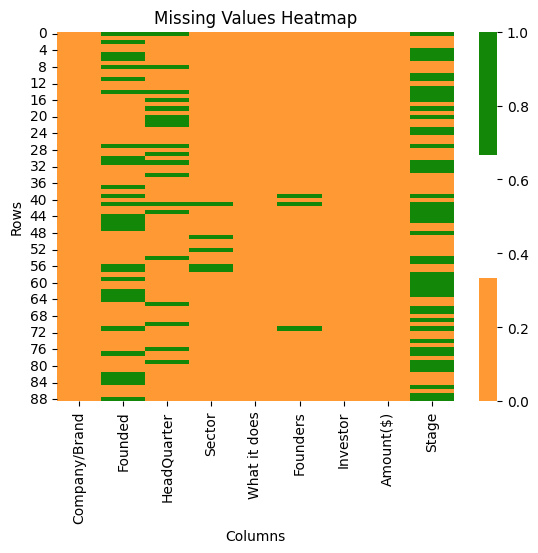

In [179]:
plot_missing_values_heatmap(data_2019)

The `Green` color is showing the missing value in dataset


    Unique values in some column we will use in analysis


Company column


In [180]:
# No missing Values found from the Vizualization

Founded column


In [181]:
# As its contained the null values  let handle by imputting the most frequest year, it

array = data_2019['Founded'].values.reshape(-1,1)
imputer = SimpleImputer(strategy='most_frequent')
data_2019['Founded'] = imputer.fit_transform(array)

In [182]:
# Convert the 'dtype to numeric
data_2019['Founded'] = data_2019['Founded'].astype(int)

Headqurter Columns


In [183]:
# Missing Values was found
check_missing_values(data_2019['HeadQuarter'])

19

Handling by replacing by `unknown


In [184]:
data_2019['HeadQuarter'] = data_2019['HeadQuarter'].fillna('Unknown')

Sector Column


In [185]:
data_2019["Sector"].unique().tolist()

['Ecommerce',
 'Edtech',
 'Interior design',
 'AgriTech',
 'Technology',
 'SaaS',
 'AI & Tech',
 'E-commerce',
 'E-commerce & AR',
 'Fintech',
 'HR tech',
 'Food tech',
 'Health',
 'Healthcare',
 'Safety tech',
 'Pharmaceutical',
 'Insurance technology',
 'AI',
 'Foodtech',
 'Food',
 'IoT',
 'E-marketplace',
 'Robotics & AI',
 'Logistics',
 'Travel',
 'Manufacturing',
 'Food & Nutrition',
 'Social Media',
 nan,
 'E-Sports',
 'Cosmetics',
 'B2B',
 'Jewellery',
 'B2B Supply Chain',
 'Games',
 'Food & tech',
 'Accomodation',
 'Automotive tech',
 'Legal tech',
 'Mutual Funds',
 'Cybersecurity',
 'Automobile',
 'Sports',
 'Healthtech',
 'Yoga & wellness',
 'Virtual Banking',
 'Transportation',
 'Transport & Rentals',
 'Marketing & Customer loyalty',
 'Infratech',
 'Hospitality',
 'Automobile & Technology',
 'Banking']

This unique values in this column indicate the diverse sectors of service among the start-ups. For better analysis, we will group similar sectors into broader categories.


In [186]:
# Group the sector based on similarity by By creating a dictionary
# The keys in the dictionary are specific sector names as they appear in the dataset.
# The values are the broder categories to which these specific sector names will be mapped to.
sector_mapping = {
    'Ecommerce': 'Ecommerce',
    'Edtech': 'Edtech',
    'Interior design': 'Interior Design',
    'AgriTech': 'AgriTech',
    'Technology': 'Technology',
    'SaaS': 'SaaS',
    'AI & Tech': 'Technology',
    'E-commerce': 'Ecommerce',
    'E-commerce & AR': 'Ecommerce',
    'Fintech': 'Fintech',
    'E-marketplace': 'Ecommerce',
    'Robotics & AI': 'Technology',
    'IoT': 'Technology',
    'Cybersecurity': 'Technology',
    'Virtual Banking': 'Fintech',
    'Banking': 'Fintech',
    'Mutual Funds': 'Fintech',
    'Insurance technology': 'Fintech',
    'HR tech': 'HR Tech',
    'Food tech': 'Food Tech',
    'Foodtech': 'Food Tech',
    'Food': 'Food Tech',
    'Food & Nutrition': 'Food Tech',
    'Food & tech': 'Food Tech',
    'Health': 'Health',
    'Healthcare': 'Health',
    'Healthtech': 'Health',
    'Yoga & wellness': 'Health',
    'Pharmaceutical': 'Health',
    'Safety tech': 'Safety Tech',
    'Logistics': 'Logistics',
    'Travel': 'Travel',
    'Transport & Rentals': 'Travel',
    'Transportation': 'Travel',
    'Accomodation': 'Travel',
    'Manufacturing': 'Manufacturing',
    'Social Media': 'Social Media',
    'E-Sports': 'E-Sports',
    'Cosmetics': 'Cosmetics',
    'B2B': 'B2B',
    'B2B Supply Chain': 'B2B',
    'Jewellery': 'Jewellery',
    'Games': 'Games',
    'Automotive tech': 'Automotive Tech',
    'Automobile': 'Automotive Tech',
    'Automobile & Technology': 'Automotive Tech',
    'Legal tech': 'Legal Tech',
    'Sports': 'Sports',
    'Marketing & Customer loyalty': 'Marketing & Customer Loyalty',
    'Infratech': 'Infratech',
    'Hospitality': 'Hospitality'
}

#  map to the 'Sector' column in the DataFrame
data_2019['Sector'] = data_2019['Sector'].map(sector_mapping)

# Display the updated unique values in the 'Sector' column
data_2019['Sector'].unique().tolist()


['Ecommerce',
 'Edtech',
 'Interior Design',
 'AgriTech',
 'Technology',
 'SaaS',
 'Fintech',
 'HR Tech',
 'Food Tech',
 'Health',
 'Safety Tech',
 nan,
 'Logistics',
 'Travel',
 'Manufacturing',
 'Social Media',
 'E-Sports',
 'Cosmetics',
 'B2B',
 'Jewellery',
 'Games',
 'Automotive Tech',
 'Legal Tech',
 'Sports',
 'Marketing & Customer Loyalty',
 'Infratech',
 'Hospitality']

Handle Missing Values


In [187]:
data_2019["Sector"] = data_2019["Sector"].fillna('Unknown')

In [188]:
data_2019.sample(15)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
82,Kratikal,2015,Uttar pradesh,Technology,Provides cyber security solutions,Pavan Kushwaha,"Gilda VC, Art Venture, Rajeev Chitrabhanu","$1,000,000",Pre-series A
9,Lenskart,2010,Delhi,Ecommerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"$275,000,000",Series G
3,HomeLane,2014,Chennai,Interior Design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
33,Asteria Aerospace,2011,Bangalore,Technology,"Develops drones that are used by the military,...","Neel Mehta, Nihar Vartak",Reliance Industries,"$230,000,000",NaN
2,Eduisfun,2015,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
87,Spinny,2015,Delhi,Automotive Tech,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN
28,HungerBox,2015,Bangalore,Food Tech,"Offers B2B tech platform to corporates, aimed ...","Sandipan Mitra, Uttam Kumar","Paytm, Asian VC fund NPTK, Sabre Partners, Neo...","$12,000,000",Series C
52,TapChief,2016,Bangalore,Unknown,It connects individuals in need of advice in a...,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,"$1,500,000",Pre series A
85,Oyo,2013,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN


Investor Column


In [189]:
data_2019["Investor"].unique().tolist()

['Sixth Sense Ventures',
 'General Atlantic',
 'Deepak Parekh, Amitabh Bachchan, Piyush Pandey',
 'Evolvence India Fund (EIF), Pidilite Group, FJ Labs',
 'Innovation in Food and Agriculture (IFA)',
 'Undisclosed',
 'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,\xa0\xa091springboard via Atal Innovation Mission, Niti Aayog.',
 'Gilda VC, Art Venture, Rajeev Chitrabhanu.',
 'Multiples Alternate Asset Management',
 'SoftBank',
 'Venture Catalysts',
 'Avataar Ventures',
 'Oikocredit',
 'Titan Capital',
 'Matrix Partners',
 'German development finance institution DEG',
 'South Africa’s Naspers Ventures, the CPP Investment Board',
 'Goldman Sachs.',
 'Mumbai Angels Network',
 'Kunal Bahl, Rohit Bansal.',
 'Brazilian VC Fund Confrapar',
 'Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.',
 'Reach Capital',
 'Inflection Point Ventures',
 'Wilson Global Opportunities Fund',
 'Sequoia Capita',
 'IVM Intersurer',
 'Canaan Partners',
 'Paytm, Asian VC fund NPT

In [190]:
data_2019["Investor"].dtype

dtype('O')

In [191]:
#  No missing values was found in this column


Amount column


Exploring unique value to understand what i need to clean


In [192]:
data_2019['Amount($)'].unique().tolist()

['$6,300,000',
 '$150,000,000',
 '$28,000,000',
 '$30,000,000',
 '$6,000,000',
 'Undisclosed',
 '$1,000,000',
 '$20,000,000',
 '$275,000,000',
 '$22,000,000',
 '$5,000,000',
 '$140,500',
 '$540,000,000',
 '$15,000,000',
 '$182,700',
 '$12,000,000',
 '$11,000,000',
 '$15,500,000',
 '$1,500,000',
 '$5,500,000',
 '$2,500,000',
 '$140,000',
 '$230,000,000',
 '$49,400,000',
 '$32,000,000',
 '$26,000,000',
 '$150,000',
 '$400,000',
 '$2,000,000',
 '$100,000,000',
 '$8,000,000',
 '$100,000',
 '$50,000,000',
 '$120,000,000',
 '$4,000,000',
 '$6,800,000',
 '$36,000,000',
 '$5,700,000',
 '$25,000,000',
 '$600,000',
 '$70,000,000',
 '$60,000,000',
 '$220,000',
 '$2,800,000',
 '$2,100,000',
 '$7,000,000',
 '$311,000,000',
 '$4,800,000',
 '$693,000,000',
 '$33,000,000']

From the summary wher saw that 13% is undisclosed


In [193]:
data_2019['Amount($)'].describe()

count              89
unique             50
top       Undisclosed
freq               12
Name: Amount($), dtype: object

remove $ in amount and converst dtype to numeric


In [194]:
# Remove the dollar sign
data_2019['Amount($)'] = data_2019['Amount($)'].str.replace('$','').replace(',', '', regex=True)

# dtype conversion to numeric
data_2019['Amount($)'] = pd.to_numeric(data_2019['Amount($)'], errors='coerce')

Dtype conversion to numeric


In [195]:
data_2019['Amount($)'].dtype

dtype('float64')

Handling Undisclosed values


In [196]:
# let replace undisclosed by null value first
data_2019['Amount($)'] = data_2019['Amount($)'].replace('Undisclosed', np.nan)

detectinh and handling the Outlier


In [197]:
Outliers= detect_outliers(data_2019, 'Amount($)')


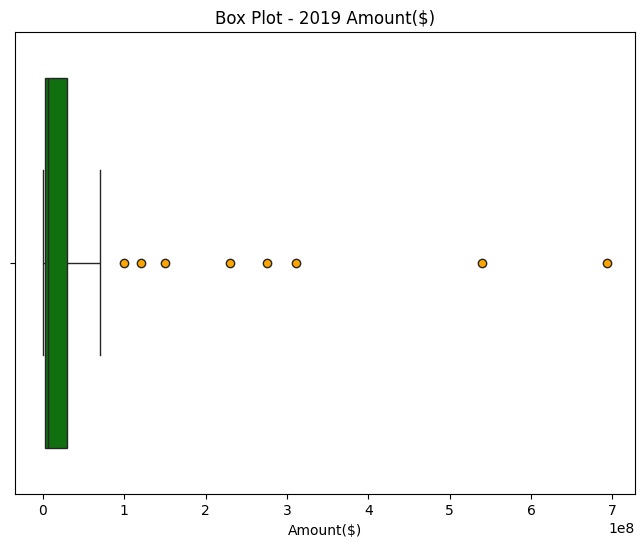

In [198]:

# Box Plot to visualize outliers

plt.figure(figsize=(8, 6))
sns.boxplot(x=data_2019['Amount($)'], color='green', flierprops=dict(markerfacecolor='orange'))
plt.title('Box Plot - 2019 Amount($)')
plt.xlabel('Amount($)')
plt.show()

handhle Ourtliers


In [199]:
from sklearn.impute import SimpleImputer

# handle missing value by imputting median strategy
imputer = SimpleImputer(strategy ='median') 

data_2019['Amount($)'] = imputer.fit_transform(data_2019[['Amount($)']])

Outliers Detection and removal in Amount column


In [200]:
detect_outliers(data_2019, 'Amount($)')

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000.0,Series C
9,Lenskart,2010,Delhi,Ecommerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,275000000.0,Series G
16,Byju's,2011,Unknown,Edtech,Provides online learning classes,Byju Raveendran,"South Africa’s Naspers Ventures, the CPP Inves...",540000000.0,NaN
33,Asteria Aerospace,2011,Bangalore,Technology,"Develops drones that are used by the military,...","Neel Mehta, Nihar Vartak",Reliance Industries,230000000.0,NaN
41,VMate,2015,Unknown,Unknown,A short video platform,NaN,Alibaba,100000000.0,NaN
48,Box8,2011,Mumbai,Food Tech,Enables to order food online,"Amit Raj, Anshul Gupta",Trifecta Capital,120000000.0,NaN
72,CarDekho,2008,Jaipur,Automotive Tech,Enables people to buy and sell new/old cars.,Amit Jain,"Ping An Global Voyager Fund, Hillhouse Capital...",70000000.0,Series D
73,Shadowfax,2015,Bangalore,Logistics,A platform for delivery services,"Abhishek Bansal, Vaibhav Khandelwal","Flipkart, Eight Roads Ventures, NGP Capital, Q...",60000000.0,Series D
80,Ola,2010,Bangalore,Travel,It enables one to book cab online,"Bhavish Aggarwal, Ankit Bhati","Kia Motors, Hyundai",311000000.0,NaN
85,Oyo,2013,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000.0,NaN


I have decise to keep the outliers as its the most amount received


In [201]:
# removing outliers:
# data_2019 = data_2019[~data_2019['Amount($)'].isin(outliers['Amount($)'])]

In [202]:
# check again 
# detect_outliers(data_2019, 'Amount($)')

Stage column


In [203]:
data_2019["Stage"].value_counts()

Stage
Series A         10
Pre series A      8
Series B          8
Series D          4
Series C          3
Fresh funding     1
Series G          1
Post series A     1
Seed funding      1
Seed fund         1
Series E          1
Series F          1
Series B+         1
Seed round        1
Pre-series A      1
Name: count, dtype: int64

In [204]:
#cleaning Funding round names as categorized based similarity
categorized_stage = {
    "Fresh funding" :"Seed",
    "Seed funding":"Seed",
    "Seed fund" :"Seed",
    "Pre series A": "Pre-series A",
    "Series B+" : "Series B",
    "Seed round" :"Seed"}
data_2019['Stage'] = data_2019['Stage'].replace(categorized_stage)

In [205]:
data_2019["Stage"].value_counts()

Stage
Series A         10
Pre-series A      9
Series B          9
Seed              4
Series D          4
Series C          3
Series G          1
Post series A     1
Series E          1
Series F          1
Name: count, dtype: int64

Handle Missing Value


the From the Viz, whe notice the missing value


In [206]:
check_missing_values(data_2019['Stage'])

46

In [207]:
data_2019['Stage'] = data_2019['Stage'].fillna('Unknown')

handle the missing value for the Founders columns


In [208]:
data_2019['Founders'] = data_2019['Founders'].fillna('Unknown')

Visualiza again the missing values


No Duplication was found


let keep track the year the investments was received


In [209]:
data_2019['Year Funded'] = 2019

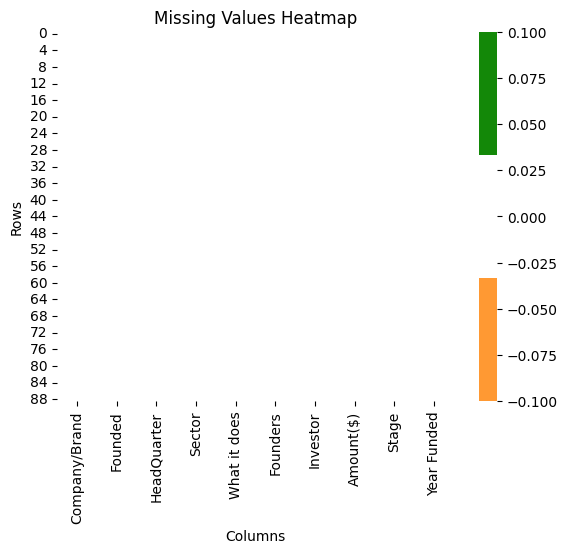

In [210]:
plot_missing_values_heatmap(data_2019)

    5.3.3 Data 2020


![Data 2020 Summary Image](Images\2020beforeCleaning.png)


In [211]:
data_2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,None,None
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,None
1052,Purplle,2012.0,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,None,None
1053,Shuttl,2015.0,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,None


Duplicates


In [212]:
data_2020= data_2020.drop_duplicates()

dropping column10


In [213]:
data_2020= data_2020.drop(['column10'], axis=1)

Missing values


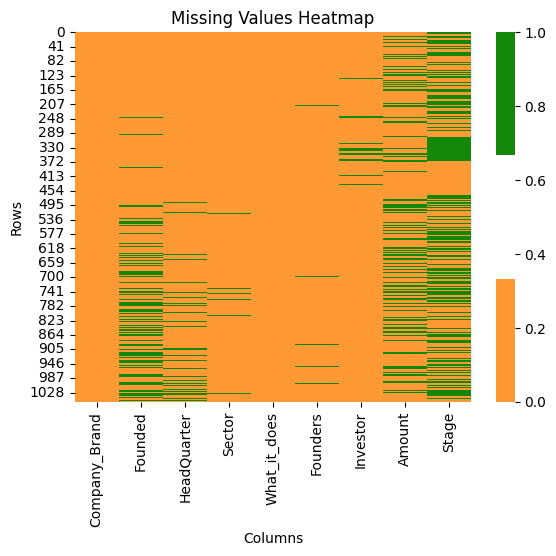

In [214]:
plot_missing_values_heatmap(data_2020)

Founded column


In [215]:
data_2020['Founded'] = data_2020['Founded'].fillna('Uknown')


headQuarter


In [216]:
check_unique_value_in_column(data_2020,'HeadQuarter')


['Chennai',
 'Bangalore',
 'Pune',
 'New Delhi',
 'Indore',
 'Hyderabad',
 'Gurgaon',
 'Belgaum',
 'Noida',
 'Mumbai',
 'Andheri',
 'Jaipur',
 'Ahmedabad',
 'Kolkata',
 'Tirunelveli, Tamilnadu',
 'Thane',
 None,
 'Singapore',
 'Gurugram',
 'Gujarat',
 'Haryana',
 'Kerala',
 'Jodhpur',
 'Jaipur, Rajastan',
 'Delhi',
 'Frisco, Texas, United States',
 'California',
 'Dhingsara, Haryana',
 'New York, United States',
 'Patna',
 'San Francisco, California, United States',
 'San Francisco, United States',
 'San Ramon, California',
 'Paris, Ile-de-France, France',
 'Plano, Texas, United States',
 'Sydney',
 'San Francisco Bay Area, Silicon Valley, West Coast',
 'Bangaldesh',
 'London, England, United Kingdom',
 'Sydney, New South Wales, Australia',
 'Milano, Lombardia, Italy',
 'Palmwoods, Queensland, Australia',
 'France',
 'San Francisco Bay Area, West Coast, Western US',
 'Trivandrum, Kerala, India',
 'Cochin',
 'Samastipur, Bihar',
 'Irvine, California, United States',
 'Tumkur, Karnataka'

From this I can see the headquarter the located outside India, So group them in Outside India category


In [217]:
#  addresses to be mapped to "Outside India"
outside_india_addresses = [
    'San Francisco, California, United States',
    'London, England, United Kingdom',
    'San Francisco Bay Area, Silicon Valley, West Coast',
    'New York, United States',
    'San Francisco, United States',
    'Tangerang, Jawa Barat, Indonesia',
    'San Ramon, California ',
    'Frisco, Texas, United States ',
    'Paris, Ile-de-France, France',
    'Plano, Texas, United States',
    'Palmwoods, Queensland, Australia',
    'France',
    'San Ramon, California',
    'San Francisco Bay Area, West Coast, Western US',
    'Irvine, California, United States',
    'Newcastle Upon Tyne, Newcastle upon Tyne, United Kingdom',
    'Shanghai, China',
    'Jiaxing, Zhejiang, China',
    'Sydney, New South Wales, Australia',
    'California',
    'Singapore',
    'San Francisco',
    'San Franciscao',
    'Sydney',
    'Bangaldesh',
    'Frisco, Texas, United States',
    'New York',
    'Bangkok',
    'Seattle',
    'Milano, Lombardia, Italy',
    'Seoul',
    'Berlin'
]

for address in outside_india_addresses:
    data_2020.loc[data_2020['HeadQuarter'] == address, 'HeadQuarter'] = 'Outside India'


In [218]:
data_2020['HeadQuarter'].unique

<bound method Series.unique of 0         Chennai
1       Bangalore
2            Pune
3       New Delhi
4          Indore
          ...    
1050        Delhi
1051         None
1052       Mumbai
1053        Delhi
1054      Chennai
Name: HeadQuarter, Length: 1052, dtype: object>

replace a 'Undisclosed' with Uknown


In [219]:

data_2020.loc[data_2020['HeadQuarter'] == 'Undisclosed', 'HeadQuarter'] = 'Uknown'

In [220]:
data_2020['HeadQuarter'] = data_2020['HeadQuarter'].map(lambda x: x.split(',')[0] if x is not None else x)

Founders column


In [221]:
# handle misisng value by fill nill null with Uknown keyword
data_2020['Founders'] = data_2020['Founders'].fillna('Uknown')

Amount Column


In [222]:
#Statistical 
data_2020["Amount"].describe()

count           799.0
mean      112699397.5
std      2479695497.0
min           12700.0
25%         1000000.0
50%         3000000.0
75%        11000000.0
max     70000000000.0
Name: Amount, dtype: float64

In [223]:
data_2020["Amount"].unique().tolist()

[200000.0,
 100000.0,
 nan,
 400000.0,
 340000.0,
 600000.0,
 45000000.0,
 1000000.0,
 2000000.0,
 1200000.0,
 660000000.0,
 120000.0,
 7500000.0,
 5000000.0,
 500000.0,
 3000000.0,
 10000000.0,
 145000000.0,
 100000000.0,
 21000000.0,
 4000000.0,
 20000000.0,
 560000.0,
 275000.0,
 4500000.0,
 15000000.0,
 390000000.0,
 7000000.0,
 5100000.0,
 700000000.0,
 2300000.0,
 700000.0,
 19000000.0,
 9000000.0,
 40000000.0,
 750000.0,
 1500000.0,
 7800000.0,
 50000000.0,
 80000000.0,
 30000000.0,
 1700000.0,
 2500000.0,
 40000.0,
 33000000.0,
 35000000.0,
 300000.0,
 25000000.0,
 3500000.0,
 200000000.0,
 6000000.0,
 1300000.0,
 4100000.0,
 575000.0,
 800000.0,
 28000000.0,
 18000000.0,
 3200000.0,
 900000.0,
 250000.0,
 4700000.0,
 75000000.0,
 8000000.0,
 121000000.0,
 55000000.0,
 3300000.0,
 11000000.0,
 16000000.0,
 5400000.0,
 150000000.0,
 4200000.0,
 22000000.0,
 52000000.0,
 1100000.0,
 118000000.0,
 1600000.0,
 18500000.0,
 70000000000.0,
 800000000.0,
 400000000.0,
 150000.0,
 1760

handle Null values


In [224]:
#Imputing missing values in the amount column using simple imputer method
array= data_2020["Amount"].values.reshape(-1,1)
imputer=SimpleImputer(strategy="median")

data_2020["Amount"]=imputer.fit_transform(array)

stage column


In [225]:
# Fill the replace null values with 'Uknown' stage
data_2020['Stage'] = data_2020['Stage'].fillna('Unkwon', inplace=True)

In [226]:
# categorize the stage 
data_2020.replace({"Stage": {"Seed Round" : "Seed",
                            "Pre series A": "Pre-series A",
                            "Pre Series A" : "Pre-series A" ,
                            "Seed round" :   "Seed",
                            "Pre seed round" :"Pre-seed",
                            "Series B2" :    "Series B",
                            "Pre series B" : "Pre-series B",
                            "Seed Funding" : "Seed",
                            "Pre-Series B" : "Pre-series B",
                            "Pre-Seed"  :    "Pre-seed",
                            "Seed funding" : "Seed",
                            "Pre-seed Round" :"Pre-seed",
                            "Series E2" :     "Series E",
                            "Pre series A1" : "Pre-series A",
                            "Series D1" :     "Series",
                            "Pre seed Round" :"Pre-seed",
                            "Pre series C"  : "Pre-Series C",
                            "Bridge Round" :  "Bridge",
                            "Series A-1" :    "Series",
                            "Pre- series A":  "Pre-series A",
                            "Seed Investment" :"Seed"}},inplace =True)

track the year of funding


In [227]:
data_2020['Year Funded'] = 2020     

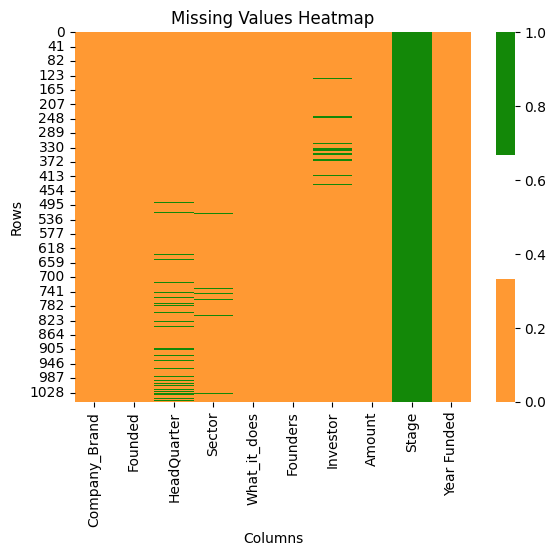

In [228]:
plot_missing_values_heatmap(data_2020)

    5.3.4 Data 2021


In [229]:
data_2021.sample(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
344,Zingavita,2020.0,Chandigarh,HealthTech,Explore a range of kids nutrition supplements ...,"Rohit Anand, Sachin Goel",Anicut Angel Fund,"$400,000",None
805,Northern Arc,2008.0,Chennai,FinTech,Northern Arc Capital (Formerly known as IFMR C...,Kshama Fernandes,"Asian Development Bank, U.S. International Dev...","$50,000,000",Debt
880,Leap India,2013.0,Mumbai,Logistics & Supply Chain,"""Leading Enterprise in Asset Pooling"" India's ...",Anurag Malempati,CDC Group,$10000000,None
795,Questt,2020.0,Gurugram,EdTech,Questt is a homework app that allows teachers ...,"Akhil Singh, Mohsin, Rohit Pande","Chiratae Ventures, AET Fund","$1,000,000",Seed
580,Rockclimber,2019.0,Bangalore,Food & Beverages,RockClimber is a new age beverage brand with a...,"Deepak Poduval, Hariprasad Shetty",Anand Prakash Sharma,$1000000,None


In [230]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


- Missing values in Founded, HeadQuarter, Founders, Investor, Amount and Stage columns
- most colummns are object

Action to take is clean each column one by one


In [231]:
# duplicates
data_2021.duplicated().sum()

19

In [232]:
# our duplicates
data_2021[data_2021.duplicated()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
107,Curefoods,2020.0,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None
109,Bewakoof,2012.0,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
117,Advantage Club,2014.0,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None
119,Ruptok,2020.0,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None
243,Trinkerr,2021.0,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A
244,Zorro,2021.0,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed
245,Ultraviolette,2021.0,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C
246,NephroPlus,2009.0,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E
247,Unremot,2020.0,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed


In [233]:
# remove duplicate
data_2021 = data_2021.drop_duplicates().reset_index(drop=True)


Handle Missing values


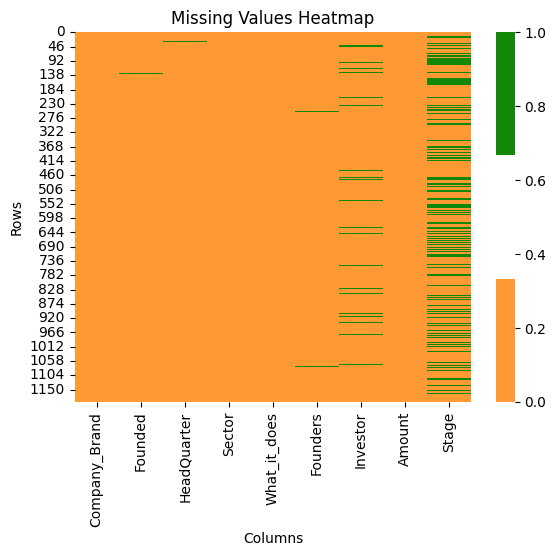

In [234]:
plot_missing_values_heatmap(data_2021)

In [235]:
#  'Founded' column
data_2021['Founded'].isnull().sum()

1

In [236]:
# Imputing missing values as its only one missing values there

array = data_2021['Founded'].values.reshape(-1,1)
imputer = SimpleImputer(strategy='most_frequent')

data_2021['Founded'] = imputer.fit_transform(array)

In [237]:
# amount column
data_2021['Amount'].unique().tolist() 

['$1,200,000',
 '$120,000,000',
 '$30,000,000',
 '$51,000,000',
 '$2,000,000',
 '$188,000,000',
 '$200,000',
 'Undisclosed',
 '$1,000,000',
 '$3,000,000',
 '$100,000',
 '$700,000',
 '$9,000,000',
 '$40,000,000',
 '$49,000,000',
 '$400,000',
 '$300,000',
 '$25,000,000',
 '$160,000,000',
 '$150,000',
 '$1,800,000',
 '$5,000,000',
 '$850,000',
 '$53,000,000',
 '$500,000',
 '$1,100,000',
 '$6,000,000',
 '$800,000',
 '$10,000,000',
 '$21,000,000',
 '$7,500,000',
 '$26,000,000',
 '$7,400,000',
 '$1,500,000',
 '$600,000',
 '$800,000,000',
 '$17,000,000',
 '$3,500,000',
 '$15,000,000',
 '$215,000,000',
 '$2,500,000',
 '$350,000,000',
 '$5,500,000',
 '$83,000,000',
 '$110,000,000',
 '$500,000,000',
 '$65,000,000',
 '$150,000,000,000',
 '$300,000,000',
 '$2,200,000',
 '$35,000,000',
 '$140,000,000',
 '$4,000,000',
 '$13,000,000',
 None,
 '$Undisclosed',
 '$2000000',
 '$800000',
 '$6000000',
 '$2500000',
 '$9500000',
 '$13000000',
 '$5000000',
 '$8000000',
 '$1000000',
 'Upsparks',
 '$200000',
 '

In [238]:
data_2021['Amount'].dtype

dtype('O')

chucks in this column $,  'JITO Angel Network, LetsVenture',  'ITO Angel Network, LetsVenture',  'Pre-series A', 'ah! Ventures', '$undisclosed', some have comma, 'Series C','Seed', 'Upsparks', '$Undisclosed', None, 'Undisclosed'

and the dtype is object


In [239]:
# Function to replace anomalous amount values with np.nan

def replace_values_with_nan(df, column_name, values_to_replace):
    df[column_name] = df[column_name].replace(values_to_replace, np.nan)
    return df

In [240]:
values_to_replace = ['Undisclosed', 'JITO Angel Network LetsVenture', 'ITO Angel Network, LetsVenture', 
                      'Pre-series A', 'ah! Ventures', '$undisclosed', 'Undisclosed', 
                      'Upsparks', 'Series C', 'Seed']
data_2021['Amount'] = data_2021['Amount'].replace(values_to_replace, np.nan)

# Step 2: Remove undesired characters
data_2021['Amount'] = data_2021['Amount'].str.replace('[$,]', '', regex=True)


In [241]:
# remove # sign in from as keep in mind the our amount is in dollar sign
# removing comm
data_2021['Amount'] = data_2021['Amount'].str.replace(',', '')

In [242]:
data_2021['Amount'].unique().tolist() 

['1200000',
 '120000000',
 '30000000',
 '51000000',
 '2000000',
 '188000000',
 '200000',
 nan,
 '1000000',
 '3000000',
 '100000',
 '700000',
 '9000000',
 '40000000',
 '49000000',
 '400000',
 '300000',
 '25000000',
 '160000000',
 '150000',
 '1800000',
 '5000000',
 '850000',
 '53000000',
 '500000',
 '1100000',
 '6000000',
 '800000',
 '10000000',
 '21000000',
 '7500000',
 '26000000',
 '7400000',
 '1500000',
 '600000',
 '800000000',
 '17000000',
 '3500000',
 '15000000',
 '215000000',
 '2500000',
 '350000000',
 '5500000',
 '83000000',
 '110000000',
 '500000000',
 '65000000',
 '150000000000',
 '300000000',
 '2200000',
 '35000000',
 '140000000',
 '4000000',
 '13000000',
 None,
 'Undisclosed',
 '9500000',
 '8000000',
 '12000000',
 '1700000',
 '150000000',
 '100000000',
 '225000000',
 '6700000',
 '1300000',
 '20000000',
 '250000',
 '52000000',
 '3800000',
 '17500000',
 '42000000',
 '2300000',
 '7000000',
 '450000000',
 '28000000',
 '8500000',
 '37000000',
 '370000000',
 '16000000',
 '44000000',

In [243]:
data_2021['Amount'] = pd.to_numeric(data_2021['Amount'])
data_2021['Amount'].dtype

ValueError: Unable to parse string "Undisclosed" at position 87

In [ ]:
Outliers2021 = detect_outliers(data_2021, 'Amount')
Outliers2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,None
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C
5,Urban Company,2014.0,New Delhi,Home services,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,188000000.0,None
15,Tessolve,1993.0,Bangalore,Electronics,Tessolve Semiconductor offers engineering in s...,"P Raja Manickam, Srinivas Chinamilli, Veerappan V",Novo Tellus Capital,40000000.0,None
16,Smart Joules,2014.0,New Delhi,Renewable Energy,Smart Joules is an energy management company.,"Arjun P Gupta, Ujjal Majumdar, Sidhartha Gupta","Raintree Family Office, ADB arm",49000000.0,None
...,...,...,...,...,...,...,...,...,...
1138,Pine Labs,1998.0,Noida,Information Technology & Services,A merchant platform company that provides fina...,Amrish Rau,Invesco Developing Markets Fund,100000000.0,None
1150,HomeLane,2014.0,Bangalore,Interior Design,"Tech-empowered teams have delivered over 20,00...",Srikanth Iyer,"IIFL AMC, Oman India Joint Investment Fund",50000000.0,Series E
1157,Peak,2014.0,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,75000000.0,Series C
1176,Delhivery,2011.0,Gurugram,Logistics & Supply Chain,Delhivery is a leading logistics and supply ch...,Sahil Barua,Addition,76000000.0,Series I


Am not removing the outliers beacause its possible to receive a hug amount


hanlde missing values


In [ ]:
# handle missing value by imputting median strategy
imputer = SimpleImputer(strategy ='median') 

data_2021['Amount'] = imputer.fit_transform(data_2021[['Amount']])

AM not removing outlier as amount the a company can receive as total investement from multiple


In [ ]:
# stage  column
data_2021['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

In [ ]:
data_2021['Stage'].isnull().sum()

421

categorized the stage column


In [ ]:

def update_value(value):

    replacements = {
        r'Pre series|Early seed|Pre-series A|Pre-series A1': 'Pre-series',
        r'Seies A|Seed+|Pre-series B|Series A2': 'Series A',
        r'PE': 'Private Equity',
        r'Debt': 'Debt Financing',
        r'Seed1': 'Seed',
        r'None': 'Venture - Series Unknown',
        r'Series A+|Series B3| Series B': 'Series B',
        r'Series F2|Series F1|Series D1|Series D|Series G|Series H|Series I|Series E|Series F': 'Series C',
    }

    for pattern, replacement in replacements.items():
        value = re.sub(pattern, replacement, str(value))

    return value


# Apply the function to the 'Stage' column of the DataFrame
data_2021['Stage'] = data_2021['Stage'].apply(update_value)

In [ ]:
data_2021['Stage'].unique()

array(['Pre-series', 'Venture - Series Unknown', 'Series C', 'Series B',
       'Pre-seed', 'Debt Financing', '$1200000', 'Bridge', 'Series B+',
       'Private Equity', 'Pre-series1', '$300000', '$6000000', '$1000000'],
      dtype=object)

In [ ]:
# Replace values

data_2021['Stage'].replace('Series B+', 'Series B', inplace=True)
data_2021['Stage'].replace('Pre-series1', 'Pre-series', inplace=True)
data_2021['Stage'].replace('Pre-Series B', 'Series A', inplace=True)
data_2021['Stage'].replace(' Series B', 'Series B', inplace=True)

Investor column


In [ ]:
data_2021['Investor'].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', None,
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO Angel Net

In [ ]:
# notice a numerical here investor named '2000000'ArithmeticError
data_2021[data_2021['Investor']== '2000000']


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
883,EyeMyEye,2021.0,Gurugram,Eyewear,"Shop the latest Eyeglasses, Sunglasses, Power ...",Ganesh Iyer,2000000,2000000.0,Pre-series


In [ ]:
# Replace the value "2000000" with the keyword "Unknown" in the 'Investor' column
data_2021['Investor'] = data_2021['Investor'].replace('2000000', 'Unknown')

In [ ]:
check_missing_values(data_2021['Investor'])

61

In [ ]:
data_2021['Investor'] = data_2021['Investor'].fillna('Unknown')

In [ ]:
data_2021['Sector'].head(10)

0        AI startup
1            EdTech
2            EdTech
3    B2B E-commerce
4           FinTech
5     Home services
6        HealthTech
7        HealthTech
8      Tech Startup
9        E-commerce
Name: Sector, dtype: object

In [ ]:
# lets track the funded year
data_2021['Year Funded'] = 2021

In [ ]:
data_2021['HeadQuarter'] = data_2021['HeadQuarter'].fillna('Unknown')

data_2021['Founders'] = data_2021['Founders'].fillna('Unknown')

check miss value after cleaning


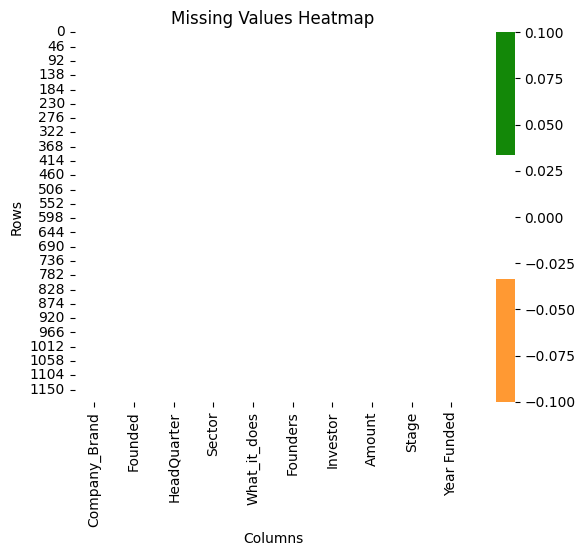

In [ ]:
plot_missing_values_heatmap(data_2021)

columns section for data analysis


In [ ]:
#Renaming columns
""" 
data_2018.rename(columns={'Industry':'Sector','Round/Series':'Stage','Location':'HeadQuarter'},inplace=True)

data_2019.rename(columns={'Company/Brand':'Company Name','Amount($)':'Amount'},inplace=True)

data_2020.rename(columns={'Company_Brand':'Company Name'},inplace=True)

data_2021.rename(columns={'Company_Brand':'Company Name'},inplace =True) """

data is ready to be combined and move to answer question and viz
